# Sobel

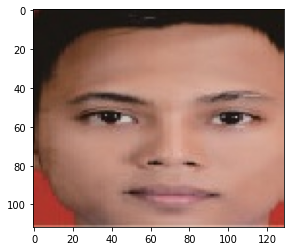

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('image.jpg')
plt.imshow(img)


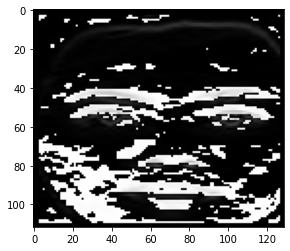

In [2]:

verticalFilter = [[-1,-2,-1],[0,0,0],[1,2,1]]

horizontalFilter = [[-1,0,1],[-2,0,2],[-1,0,1]]

n,m,d = img.shape

verticalEdgesImg = np.zeros_like(img)

for row in range(3,n-2):
    for col in range(3,m-2):
        localPixels = img[row-1:row+2, col-1:col+2,0]
        transformedPixels = verticalFilter*localPixels
        verticalScore = (transformedPixels.sum()+4)/8
        verticalEdgesImg[row,col] = [verticalScore]*3

plt.imshow(verticalEdgesImg)

# Laplacian

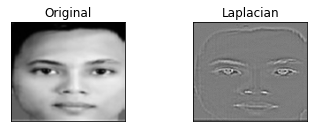

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# loading image
#img0 = cv2.imread('SanFrancisco.jpg',)
img0 = cv2.imread('image.jpg',)
plt.imshow(img0)
# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()


# Prewitt

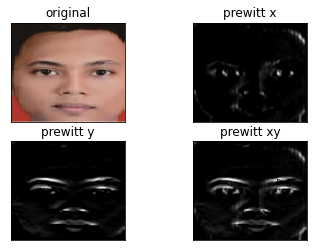

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread("image.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imgGauss = cv2.GaussianBlur(gray,(3,3),0)

kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
imgPrewittx = cv2.filter2D(imgGauss, -1, kernelx)
imgPrewitty = cv2.filter2D(imgGauss, -1, kernely)
#plt.imshow(imgPrewittx)
#plt.imshow(imgPrewitty)

plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('original'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,2),plt.imshow(imgPrewittx,cmap='gray')
plt.title('prewitt x'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,3),plt.imshow(imgPrewitty,cmap='gray')
plt.title('prewitt y'),plt.xticks([]),plt.yticks([])

plt.subplot(2,2,4),plt.imshow(imgPrewittx+imgPrewitty,cmap='gray')
plt.title('prewitt xy'),plt.xticks([]),plt.yticks([])
plt.show()

# Histogram Equalization

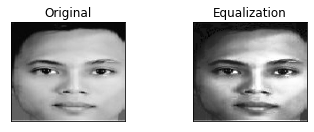

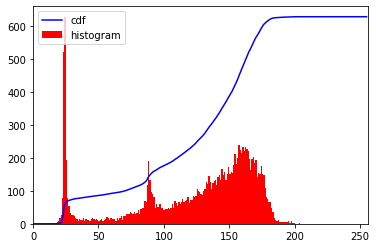

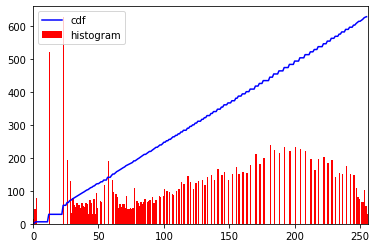

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# loading image
img = cv2.imread('image.jpg',0)

equ = cv2.equalizeHist(img)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(equ,cmap = 'gray')
plt.title('Equalization'),plt.xticks([]),plt.yticks([])

plt.show()

#Original
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()

#Equalization
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')

plt.show()
